In [4]:
import pyspark

#### Start Spark cluster

In [5]:
from pyspark.sql import SparkSession

In [6]:
spark =SparkSession.builder.getOrCreate()

In [7]:
spark = SparkSession.builder.appName('Practice').getOrCreate()

In [8]:
pyspark.__version__

'3.2.1'

In [9]:
spark

In [10]:
staticDataFrame = spark.read.format("csv")\
.option("header", "true")\
.option("inferSchema", "true")\
.load("/MyProjects/Spark-The-Definitive-Guide/data/retail-data/by-day/*.csv")
staticDataFrame.createOrReplaceTempView("retail_data")
staticSchema = staticDataFrame.schema

In [11]:
df = spark.read.format("csv")\
.option("header", "true")\
.option("inferSchema", "true")\
.load("/MyProjects/Spark-The-Definitive-Guide/data/retail-data/by-day/2010-12-01.csv")

df.printSchema()
df.createOrReplaceTempView("dfTable")

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)



### Arrays 
- take every singe word in Description columns and convert into row
- Turn the Description column into a complex tyre first

In [12]:
df.show(6)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|2010-12-01 08:26:00|     7.65|   17850.0|United Kingdom|
+---------+---------+-------

In [16]:
from pyspark.sql.functions import split
from pyspark.sql.functions import *
df.select(split(col("Description"), " ")).show(2)

+-------------------------+
|split(Description,  , -1)|
+-------------------------+
|     [WHITE, HANGING, ...|
|     [WHITE, METAL, LA...|
+-------------------------+
only showing top 2 rows



##### Manipulate this complaex type as another column

In [18]:
df.select(split(col("Description"), " ").alias("array_col"))\
.selectExpr("array_col[0]").show(2)

+------------+
|array_col[0]|
+------------+
|       WHITE|
|       WHITE|
+------------+
only showing top 2 rows



##### Get array length

In [19]:
from pyspark.sql.functions import size

In [21]:
df.select(      size(      split(col("Description"), " ").alias("array_col")  ) ).show(2)

+--------------------------------------------+
|size(split(Description,  , -1) AS array_col)|
+--------------------------------------------+
|                                           5|
|                                           3|
+--------------------------------------------+
only showing top 2 rows



##### Check array contains

In [22]:
df.select(array_contains(split(col("Description"), " "), "WHITE")).show(10)

+------------------------------------------------+
|array_contains(split(Description,  , -1), WHITE)|
+------------------------------------------------+
|                                            true|
|                                            true|
|                                           false|
|                                           false|
|                                            true|
|                                           false|
|                                           false|
|                                           false|
|                                           false|
|                                           false|
+------------------------------------------------+
only showing top 10 rows



In [23]:
spark.sql("SELECT array_contains(split(Description, ' '), 'WHITE') FROM dfTable").show(5)

+------------------------------------------------+
|array_contains(split(Description,  , -1), WHITE)|
+------------------------------------------------+
|                                            true|
|                                            true|
|                                           false|
|                                           false|
|                                            true|
+------------------------------------------------+
only showing top 5 rows



#### Explode - takes a column consists of arrays and create new row

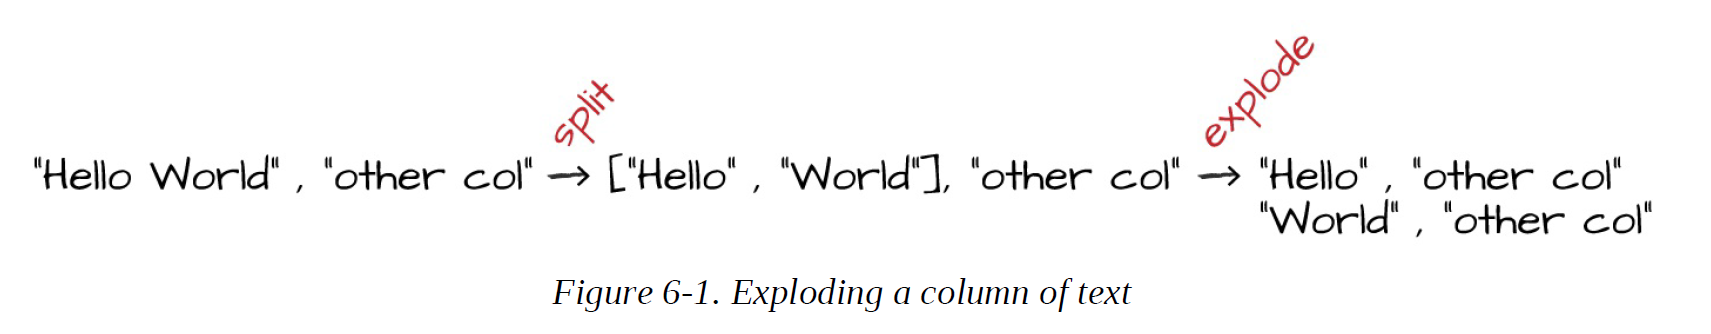

In [28]:
from pyspark.sql.functions import split, explode

df.withColumn("splitted", split(col("Description"), " ")).show(5)


df.withColumn("splitted", split(col("Description"), " "))\
.withColumn("exploded", explode(col("splitted")))\
.select("Description", "InvoiceNo", "exploded").show(2)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+--------------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|            splitted|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+--------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|[WHITE, HANGING, ...|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|[WHITE, METAL, LA...|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|[CREAM, CUPID, HE...|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|[KNITTED, UNION, ...|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|Unite

####  Maps

In [30]:
df.show(5)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
only showing top 5 rows



In [31]:
from pyspark.sql.functions import create_map
df.select(create_map(col("Quantity"), col("InvoiceNo")).alias("complex_map"))\
.show(2)

+-------------+
|  complex_map|
+-------------+
|{6 -> 536365}|
|{6 -> 536365}|
+-------------+
only showing top 2 rows



In [32]:
df.select(map(col("Description"), col("InvoiceNo")).alias("complex_map"))\
.selectExpr("complex_map['WHITE METAL LANTERN']").show(2)

TypeError: Column is not iterable

In [33]:
spark.stop()